In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [2]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [3]:
# TO ensure the GPU is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')

GPU is Available!


In [4]:
# Load and explore the dataset
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [5]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


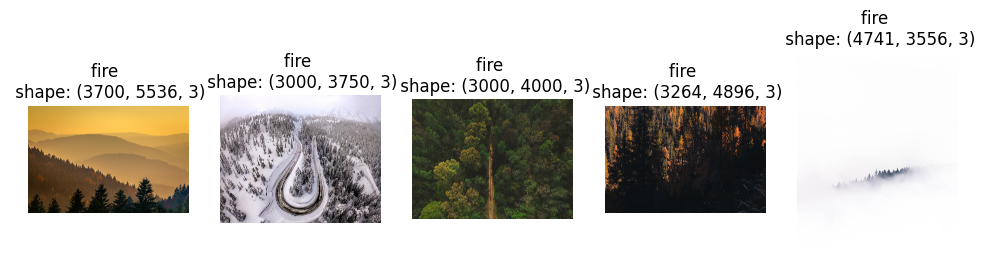

In [13]:
# Let's visualize the images in the dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

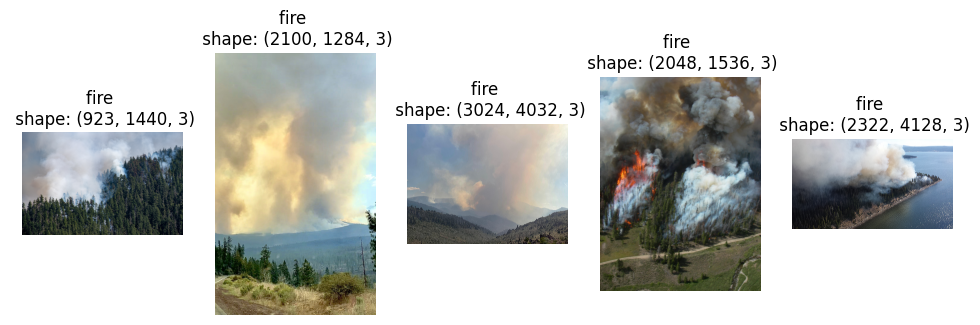

In [16]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [17]:
# Preprocessing
# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32 # there will be 32 images in a batch!

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [18]:
# map the indices
class_mapping = train_generator.class_indices
# print(class_mapping)
# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


In [19]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,073 (72.61 MB)

 Trainable params: 19,034,625 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.h5',                # File to save best model
    monitor='val_loss',             # Monitor validation loss (or accuracy)
    save_best_only=True,            # Save the best model only
    save_weights_only=False        # Save the full model (weights + architecture)
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[checkpoint]  # Add ModelCheckpoint callback
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
11/58 ━━━━━━━━━━━━━━━━━━━━ 5:10 7s/step - accuracy: 0.6324 - loss: 9.7836

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


23/58 ━━━━━━━━━━━━━━━━━━━━ 3:56 7s/step - accuracy: 0.6423 - loss: 9.0136

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6455 - loss: 6.9395

58/58 ━━━━━━━━━━━━━━━━━━━━ 494s 8s/step - accuracy: 0.6456 - loss: 6.8965 - val_accuracy: 0.3958 - val_loss: 5.3541
Epoch 2/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6562 - loss: 2.5615

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6562 - loss: 2.5615 - val_accuracy: 0.4010 - val_loss: 4.9085
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 481s 8s/step - accuracy: 0.6707 - loss: 1.5031 - val_accuracy: 0.3984 - val_loss: 7.5682
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5938 - loss: 1.3016 - val_accuracy: 0.3880 - val_loss: 7.2495
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 503s 9s/step - accuracy: 0.7005 - loss: 0.8346 - val_accuracy: 0.4635 - val_loss: 6.0128
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7188 - loss: 0.5176 - val_accuracy: 0.4714 - val_loss: 5.8050
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6991 - loss: 0.6974

58/58 ━━━━━━━━━━━━━━━━━━━━ 489s 8s/step - accuracy: 0.6992 - loss: 0.6978 - val_accuracy: 0.4766 - val_loss: 4.6679
Epoch 8/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8438 - loss: 0.3122

58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8438 - loss: 0.3122 - val_accuracy: 0.4922 - val_loss: 4.3680
Epoch 9/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7257 - loss: 0.6319

58/58 ━━━━━━━━━━━━━━━━━━━━ 503s 8s/step - accuracy: 0.7258 - loss: 0.6309 - val_accuracy: 0.4375 - val_loss: 1.9151
Epoch 10/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8125 - loss: 0.4258

58/58 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8125 - loss: 0.4258 - val_accuracy: 0.4401 - val_loss: 1.8462
Epoch 11/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 484s 8s/step - accuracy: 0.7597 - loss: 0.5205 - val_accuracy: 0.4349 - val_loss: 2.3382
Epoch 12/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7812 - loss: 0.5378 - val_accuracy: 0.4401 - val_loss: 2.2800


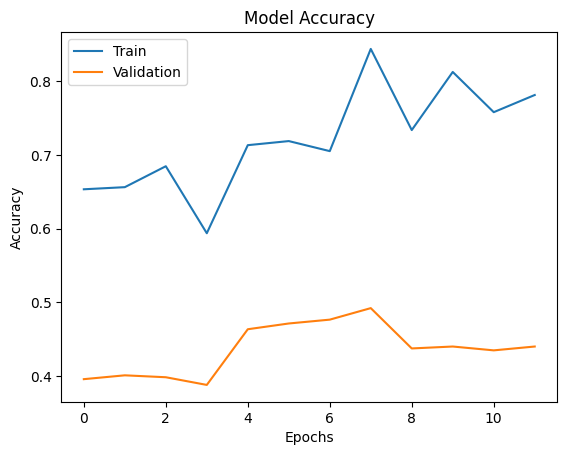

In [22]:
# Evaluate the model - plotting training and validation acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

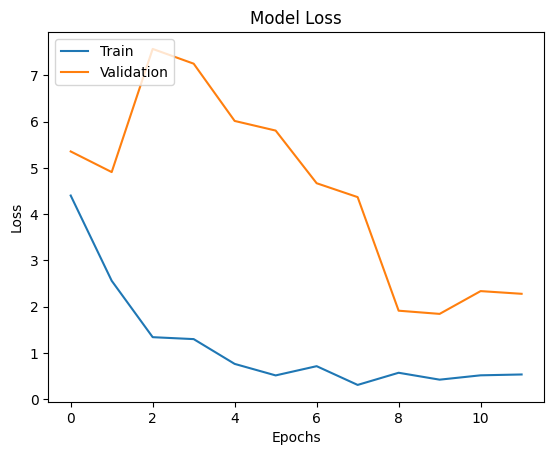

In [23]:
# Evaluate the model - plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
# Evaluate the model using test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc:.4f}')

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 8/12 ━━━━━━━━━━━━━━━━━━━━ 26s 7s/step - accuracy: 0.4237 - loss: 2.3897

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


11/12 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.4279 - loss: 2.3294 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 87s 7s/step - accuracy: 0.4302 - loss: 2.2991
Test Accuracy: 0.4427


In [25]:
# Save the model
model.save('FFD.keras')

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('FFD.keras')

# Predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [27]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire')

['josh-sorenson-w_QAjcf1ipU-unsplash.jpg',
 'balazs-busznyak-AhMSy4GpU0w-unsplash.jpg',
 '52358616216_ec885ff145_o.jpg',
 'matthias-heil-T7lMR-syZAg-unsplash.jpg',
 'mark-boss-KG8N1Rqf02w-unsplash.jpg',
 'chris-barbalis-SIbpq4Lvzdk-unsplash.jpg',
 'brendan-beale-h3qe4EZd4_4-unsplash.jpg',
 'dan-rogers-G807nWEuFIo-unsplash.jpg',
 'hala-alghanim-yyE90v_E8dA-unsplash.jpg',
 'zetong-li-79sabz_JrXg-unsplash.jpg',
 'federico-bottos-JUFuI-kBtas-unsplash.jpg',
 'single-earth-FP5tOXT6aMs-unsplash.jpg',
 'sunnie-KJ_G43MHDf0-unsplash.jpg',
 '35581707273_fed23248e8_o.jpg',
 'martin-sanchez-ML6kHR--Uys-unsplash.jpg',
 'marek-piwnicki-DCGABYDIdT0-unsplash.jpg',
 'austin-schmid-zQ-y4Gj8194-unsplash.jpg',
 'rhema-kallianpur-t0GpJ2cdJuo-unsplash.jpg',
 'victor-rodriguez-e5g9otcYzkU-unsplash.jpg',
 'kristaps-ungurs-7aY6JOyFY8A-unsplash.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 'daniil-silantev-VggwSJxYlAw-unsplash.jpg',
 'josh-withers-UN_W3z4D0pw-unsplash.jpg',
 'dave-hoefler-swH_IVJGLDA-unsplash.jpg',
 '

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


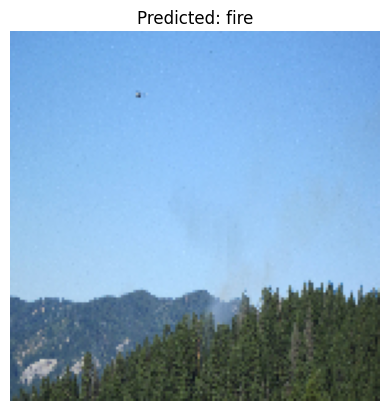

In [30]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/20960888741_8c4be2c1df_o.jpg')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')